In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv('credit_card_approval.csv')

In [3]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.000000,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.000000,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.000000,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.000000,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.000000,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [4]:
# Checking Information of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  JOB              

# INFERENCES :-

* No null or missing value is found in prelimenary investigation.
* There are 10 numerical columns and 9 categorical columns.
* The columns which has No and Yes wil be converted to 0's and 1's respectively, which will reduce the categorical columns to 6.

In [5]:
# Checking the Shape
print(f'The Shape Of The Row Is : {data.shape[0]}')
print(f'The Shape Of The Columns Is : {data.shape[1]}')

The Shape Of The Row Is : 537667
The Shape Of The Columns Is : 19


In [6]:
# Checking Duplicates 
data.duplicated().sum()

0

In [7]:
# Checking Missing Values 
data.isnull().sum()
# There is no missing values

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
JOB                    0
BEGIN_MONTHS           0
STATUS                 0
TARGET                 0
dtype: int64

In [8]:
# Statistical Summary for Categorical Variable
data.describe(include=object).T

,count,unique,top,freq
CODE_GENDER,537667,2,F,333832
FLAG_OWN_CAR,537667,2,N,306207
FLAG_OWN_REALTY,537667,2,Y,345471
CNT_CHILDREN,537667,3,No children,343151
NAME_EDUCATION_TYPE,537667,5,Secondary / secondary special,358317
NAME_FAMILY_STATUS,537667,5,Married,384003
NAME_HOUSING_TYPE,537667,6,House / apartment,474177
JOB,537667,18,Laborers,131572
STATUS,537667,8,C,226185


In [9]:
# Statistical Summary for Numerical Variable
data.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
ID,537667.000000,5079231.308957,42001.999788,5008806.000000,5044925.000000,5079091.000000,5115755.000000,5150487.000000
AMT_INCOME_TOTAL,537667.000000,197117.126677,104138.963465,27000.000000,135000.000000,180000.000000,229500.000000,1575000.000000
DAYS_BIRTH,537667.000000,-15010.958999,3416.418092,-24611.000000,-17594.000000,-14785.000000,-12239.000000,-7489.000000
DAYS_EMPLOYED,537667.000000,-2762.029935,2393.919456,-15713.000000,-3661.000000,-2147.000000,-1050.000000,-17.000000
FLAG_MOBIL,537667.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
FLAG_WORK_PHONE,537667.000000,0.281615,0.449787,0.000000,0.000000,0.000000,1.000000,1.000000
FLAG_PHONE,537667.000000,0.298893,0.457773,0.000000,0.000000,0.000000,1.000000,1.000000
FLAG_EMAIL,537667.000000,0.100730,0.300971,0.000000,0.000000,0.000000,0.000000,1.000000
BEGIN_MONTHS,537667.000000,-19.305241,14.037827,-60.000000,-29.000000,-17.000000,-8.000000,0.000000
TARGET,537667.000000,0.003649,0.060298,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
#Renaming the columns for better understanding
data.rename(columns={'CODE_GENDER':'Gender',
                     'FLAG_OWN_CAR':'Has_a_car',
                     'FLAG_OWN_REALTY':'Has_a_property',
                     'CNT_CHILDREN':'Children_count',
                     'AMT_INCOME_TOTAL':'Income',
                     'NAME_EDUCATION_TYPE':'Education_level',
                     'NAME_FAMILY_STATUS':'Marital_status',
                     'NAME_HOUSING_TYPE':'Dwelling',
                     'DAYS_BIRTH':'Days_birth',
                     'DAYS_EMPLOYED':'Days_employed',
                     'FLAG_MOBIL':'Has_a_mobile_phone',
                     'FLAG_WORK_PHONE':'Has_a_work_phone',
                     'FLAG_PHONE':'Has_a_phone',
                     'FLAG_EMAIL':'E-mail',
                     'JOB':'Job_title',
                     'BEGIN_MONTHS':'Begin_month',
                     'STATUS':'Status',
                     'TARGET':'Target'
                    },inplace=True)

In [11]:
# Now we check the changes
data.head()

,ID,Gender,Has_a_car,Has_a_property,Children_count,Income,Education_level,Marital_status,Dwelling,Days_birth,Days_employed,Has_a_mobile_phone,Has_a_work_phone,Has_a_phone,E-mail,Job_title,Begin_month,Status,Target
0,5065438,F,Y,N,2+ children,270000.000000,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.000000,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.000000,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.000000,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.000000,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [12]:
# Statistical Summary for Categorical Variable
data.describe(include=object).T

,count,unique,top,freq
Gender,537667,2,F,333832
Has_a_car,537667,2,N,306207
Has_a_property,537667,2,Y,345471
Children_count,537667,3,No children,343151
Education_level,537667,5,Secondary / secondary special,358317
Marital_status,537667,5,Married,384003
Dwelling,537667,6,House / apartment,474177
Job_title,537667,18,Laborers,131572
Status,537667,8,C,226185


In [13]:
# Statistical Summary for Categorical Variable
data.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
ID,537667.000000,5079231.308957,42001.999788,5008806.000000,5044925.000000,5079091.000000,5115755.000000,5150487.000000
Income,537667.000000,197117.126677,104138.963465,27000.000000,135000.000000,180000.000000,229500.000000,1575000.000000
Days_birth,537667.000000,-15010.958999,3416.418092,-24611.000000,-17594.000000,-14785.000000,-12239.000000,-7489.000000
Days_employed,537667.000000,-2762.029935,2393.919456,-15713.000000,-3661.000000,-2147.000000,-1050.000000,-17.000000
Has_a_mobile_phone,537667.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Has_a_work_phone,537667.000000,0.281615,0.449787,0.000000,0.000000,0.000000,1.000000,1.000000
Has_a_phone,537667.000000,0.298893,0.457773,0.000000,0.000000,0.000000,1.000000,1.000000
E-mail,537667.000000,0.100730,0.300971,0.000000,0.000000,0.000000,0.000000,1.000000
Begin_month,537667.000000,-19.305241,14.037827,-60.000000,-29.000000,-17.000000,-8.000000,0.000000
Target,537667.000000,0.003649,0.060298,0.000000,0.000000,0.000000,0.000000,1.000000


In [14]:
# Gender column have 2 values M & F
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [15]:
# Checking Numericals Columns 
num_cols = data.select_dtypes(include=np.number).columns
num_cols

Index(['ID', 'Income', 'Days_birth', 'Days_employed', 'Has_a_mobile_phone',
       'Has_a_work_phone', 'Has_a_phone', 'E-mail', 'Begin_month', 'Target'],
      dtype='object')

In [16]:
# Checking Categorical Variable 
cat_cols = data.select_dtypes(include=object).columns
cat_cols

Index(['Gender', 'Has_a_car', 'Has_a_property', 'Children_count',
       'Education_level', 'Marital_status', 'Dwelling', 'Job_title', 'Status'],
      dtype='object')

# UNIVARIATE ANALYSIS 

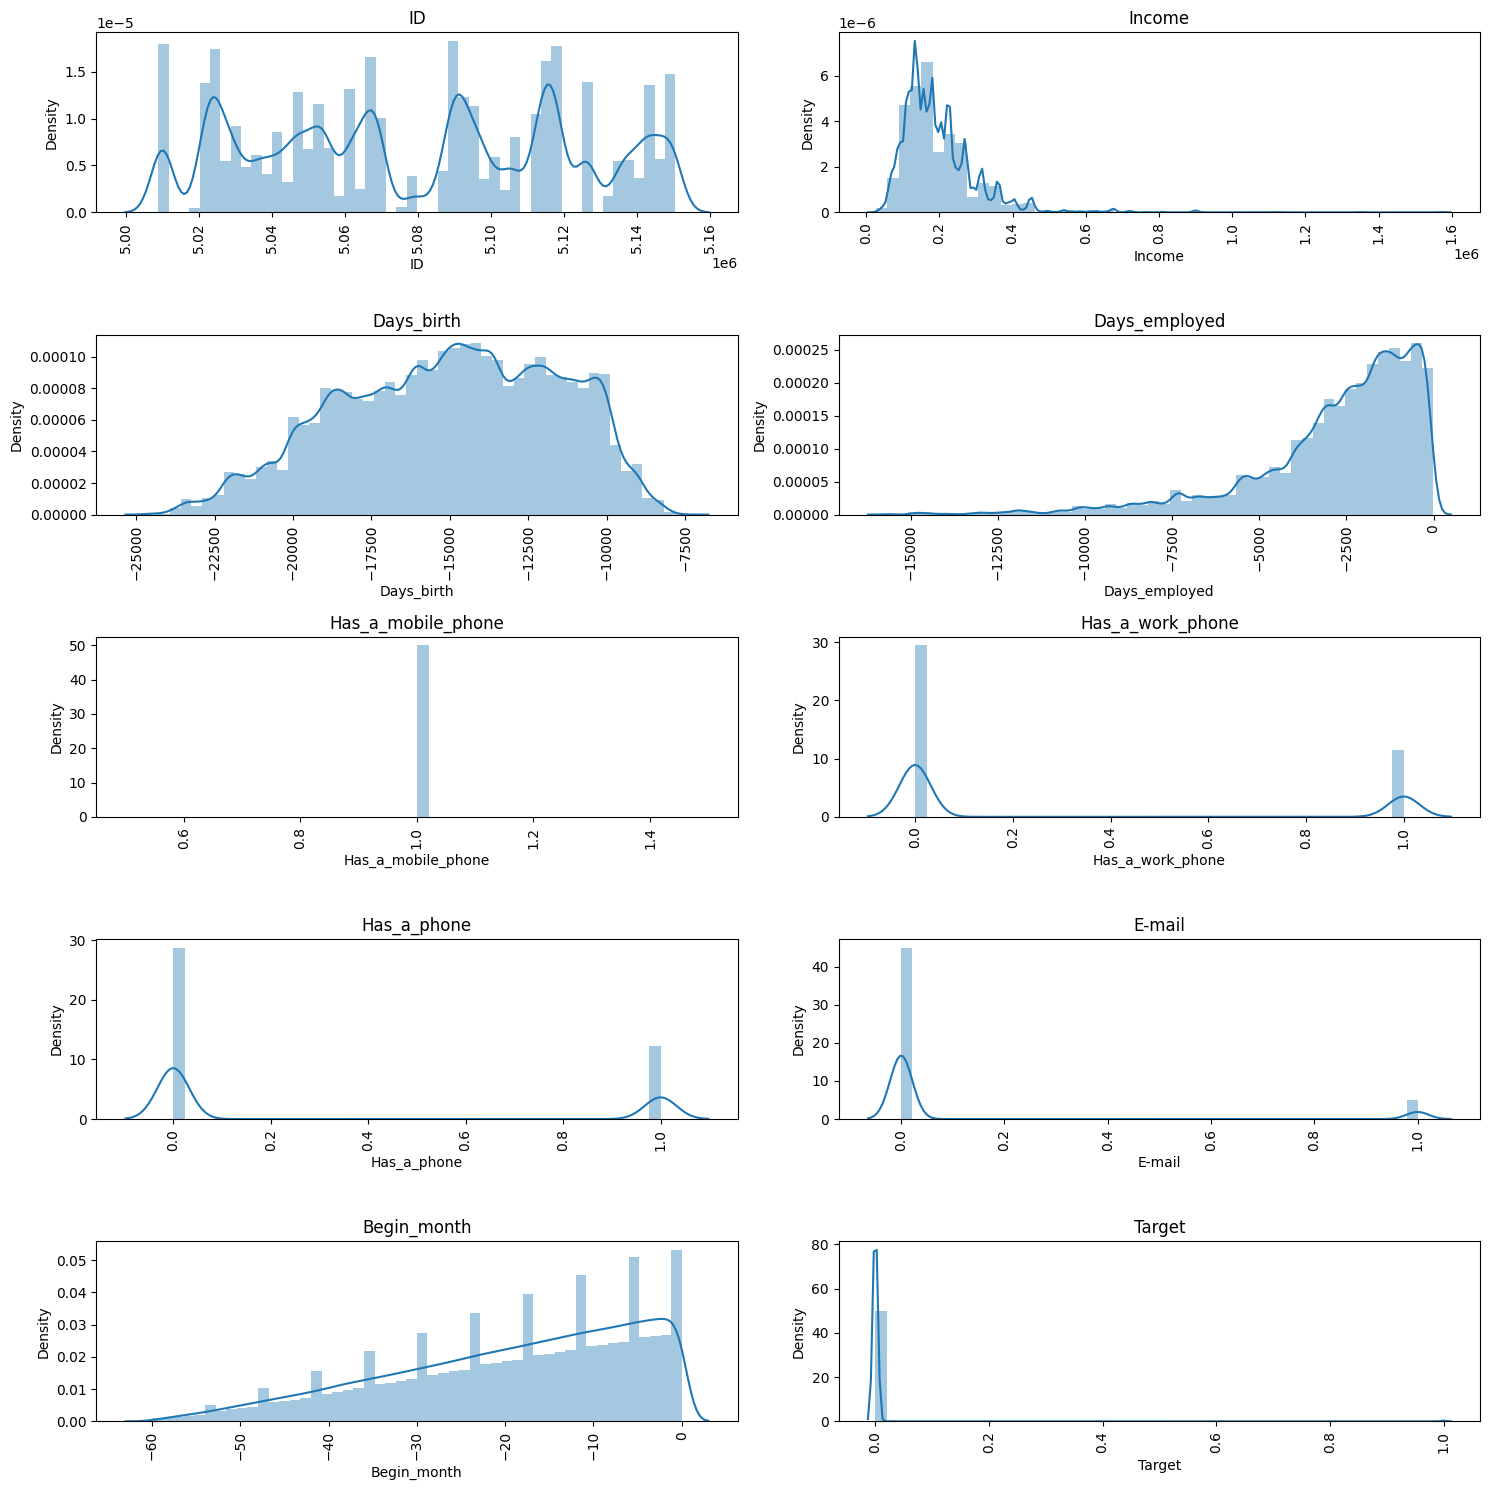

In [17]:
plt.figure(figsize=(15,15))
r = 5
c = 2
t = 1
for i in num_cols:
    plt.subplot(r,c,t)
    sns.distplot(data[i])
    t+=1
    plt.title(i)
    plt.xticks(rotation = 90)
    plt.tight_layout()
plt.show()

## Inferences of Univariate Analysis of numerical columns.
* Income is Positively skewed which means there are outliers in the data.
* Age, Years_employed and Months_applied all are positively skewed.

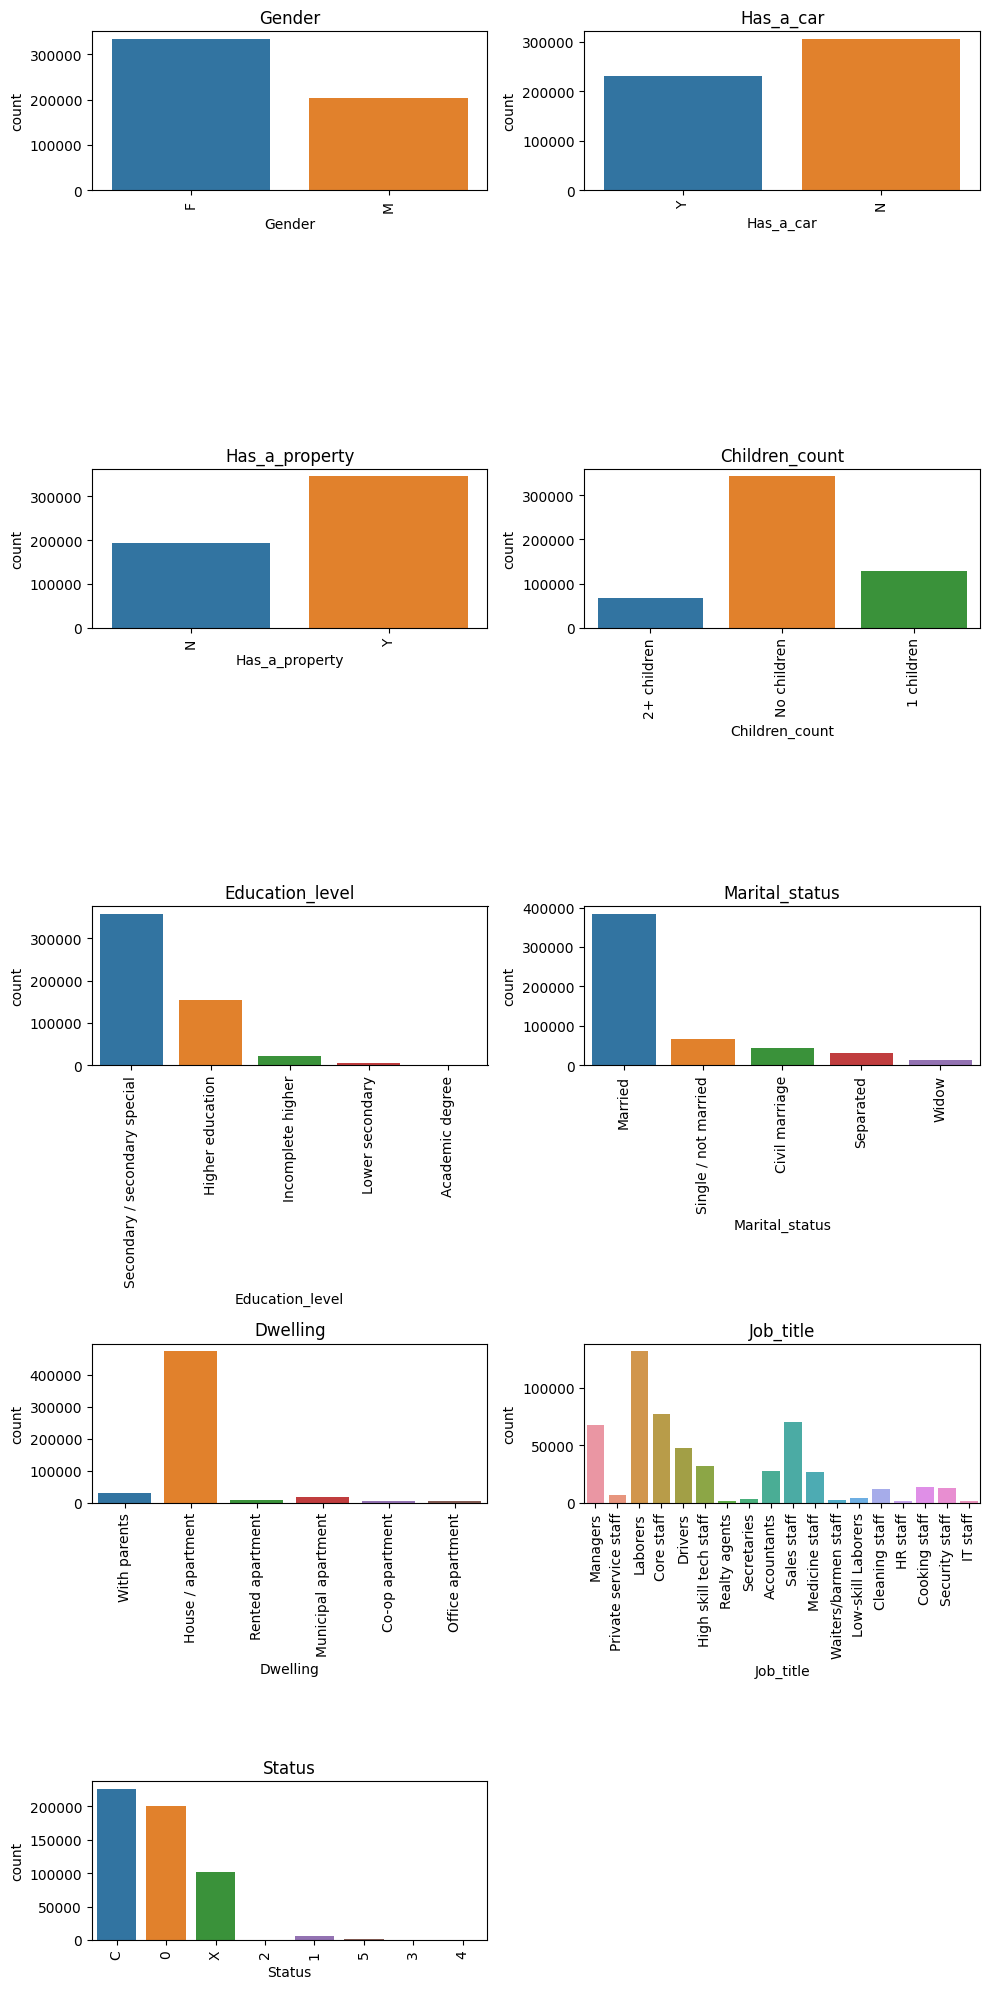

In [18]:
plt.figure(figsize=(10,20))
r = 5
c = 2
t = 1
for i in cat_cols:
    plt.subplot(r,c,t)
    sns.countplot(data[i])
    t+=1
    plt.title(i)
    plt.xticks(rotation = 90)
    plt.tight_layout()
plt.show()

# Inferences of Univariate Analysis of categorical columns.
* Majority of the applicants have no children, followed by 1 child and 2 children.
* Most of the applicants have 'Secondary/secondary special' as education level, followed by Higher education and incomplete higher education which means many of them are high school dropouts.
* A large number of applicants are Living in their own House/Apartment. There are a few who are residing with their parents and in Municipal apartments followed by rented apartments.
* Most of the applicants are labourers, followed by Drivers and sales staff. There are other professions too that have a significant number of applicants.
* Most of the applicants are Married followed by single or unmarried.
* Most of the applicants fall in the C Category of column status which means that they have paid there debt in the same month they took it. There are significant number of applicants too who have no debts on them so they fall in X category.
* Almost half the applicants have debts pending which are due for 1-29 days.
* There are certain applicants whose debts have been considered as bad debts by the banks.

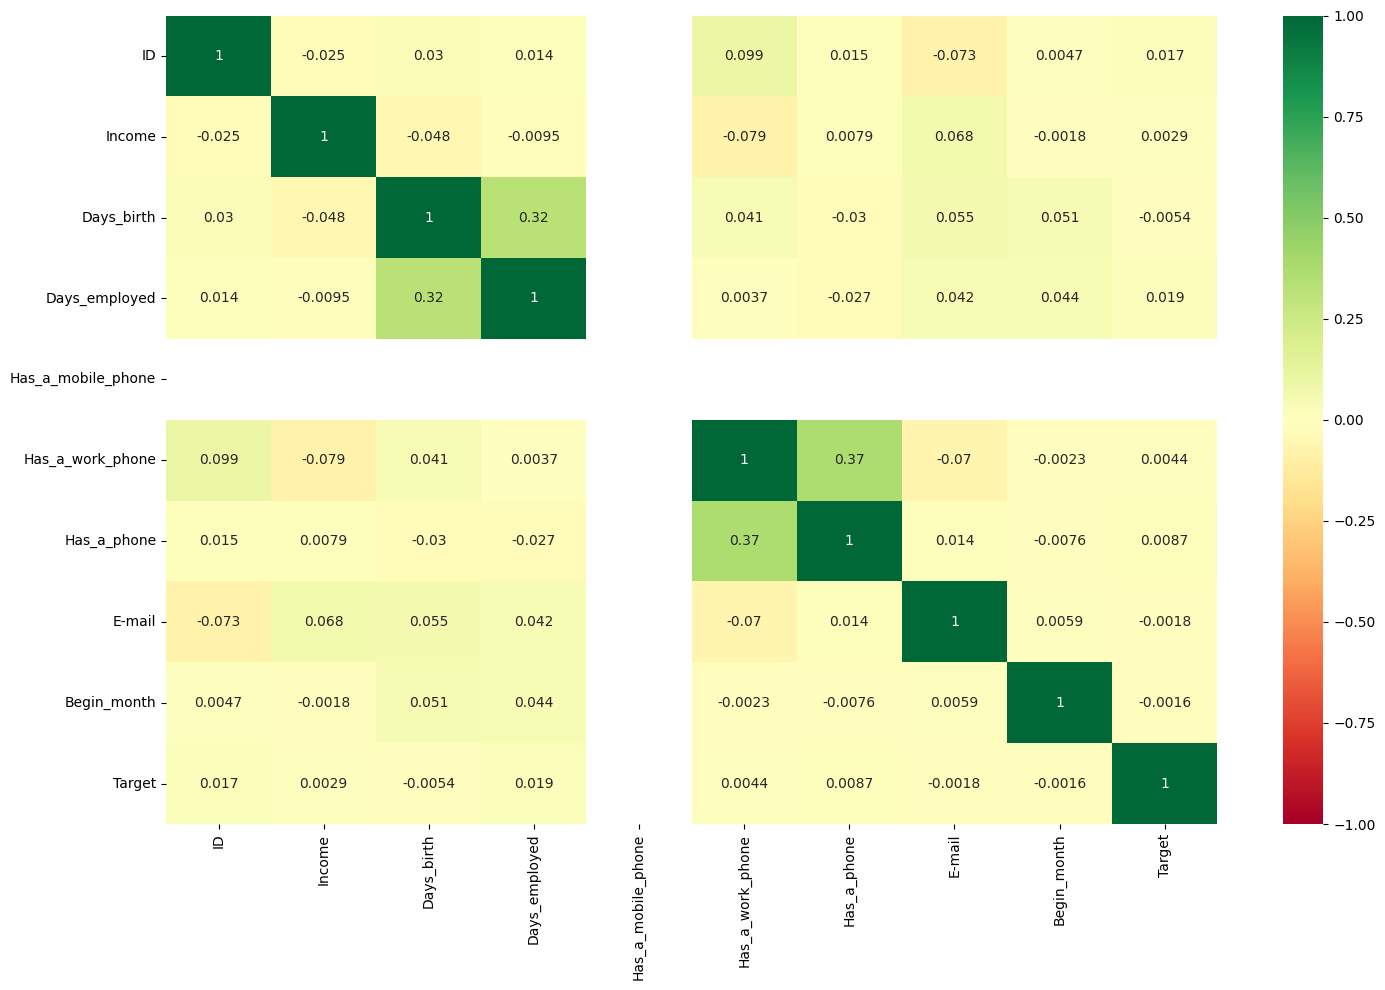

In [19]:
# Correlation Matrix 
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap='RdYlGn')
plt.tight_layout()
plt.show()

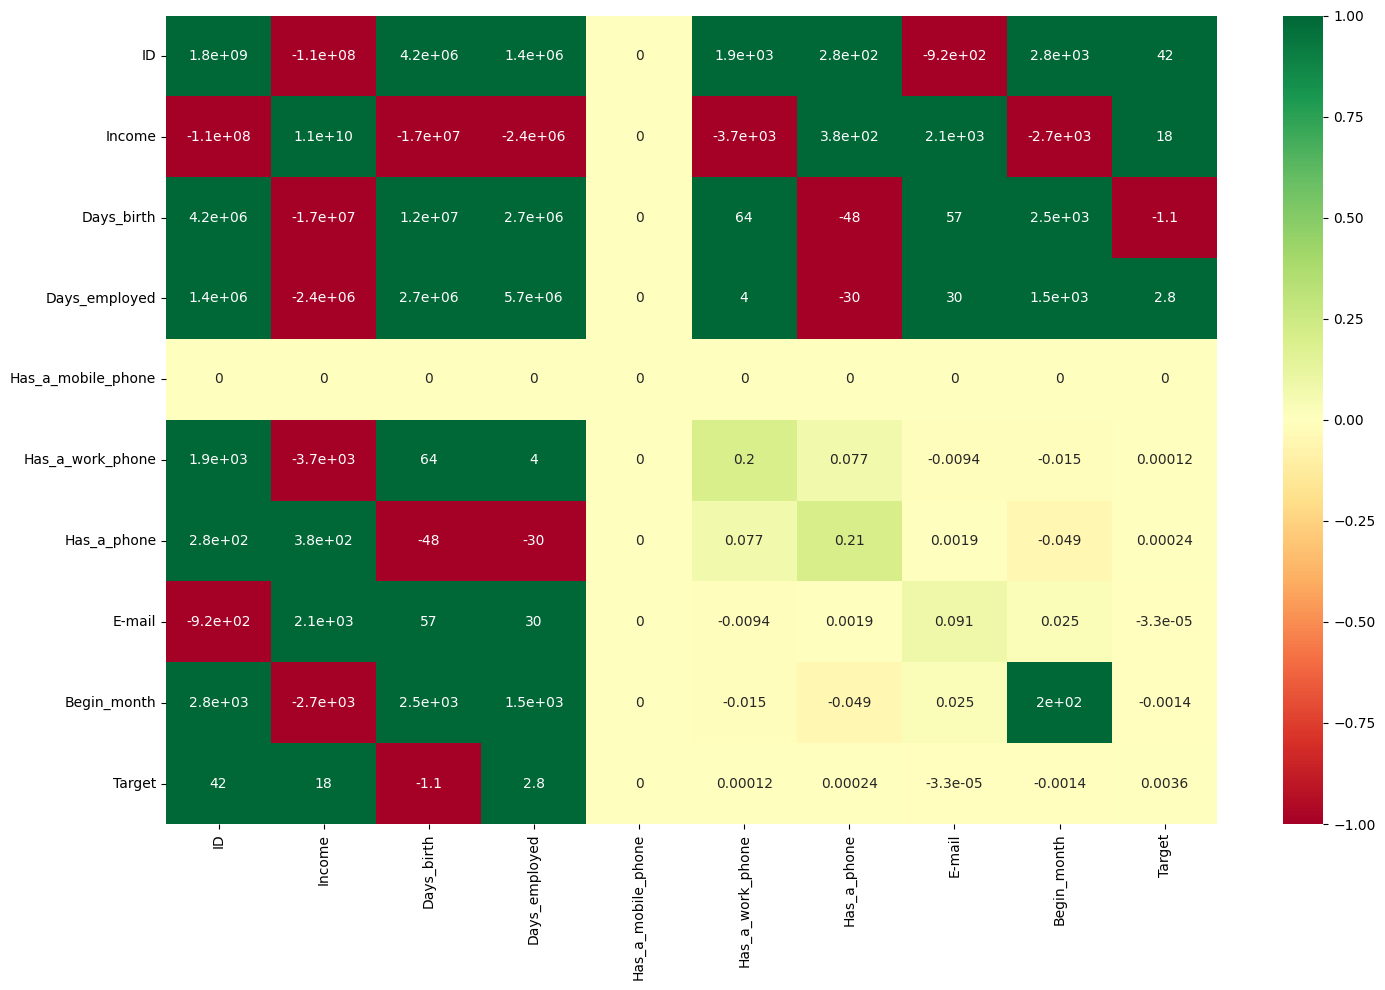

In [20]:
# Covariance Table
plt.figure(figsize=(15,10))

sns.heatmap(data.cov(),annot=True,vmin=-1,vmax=1,cmap='RdYlGn')
plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS 

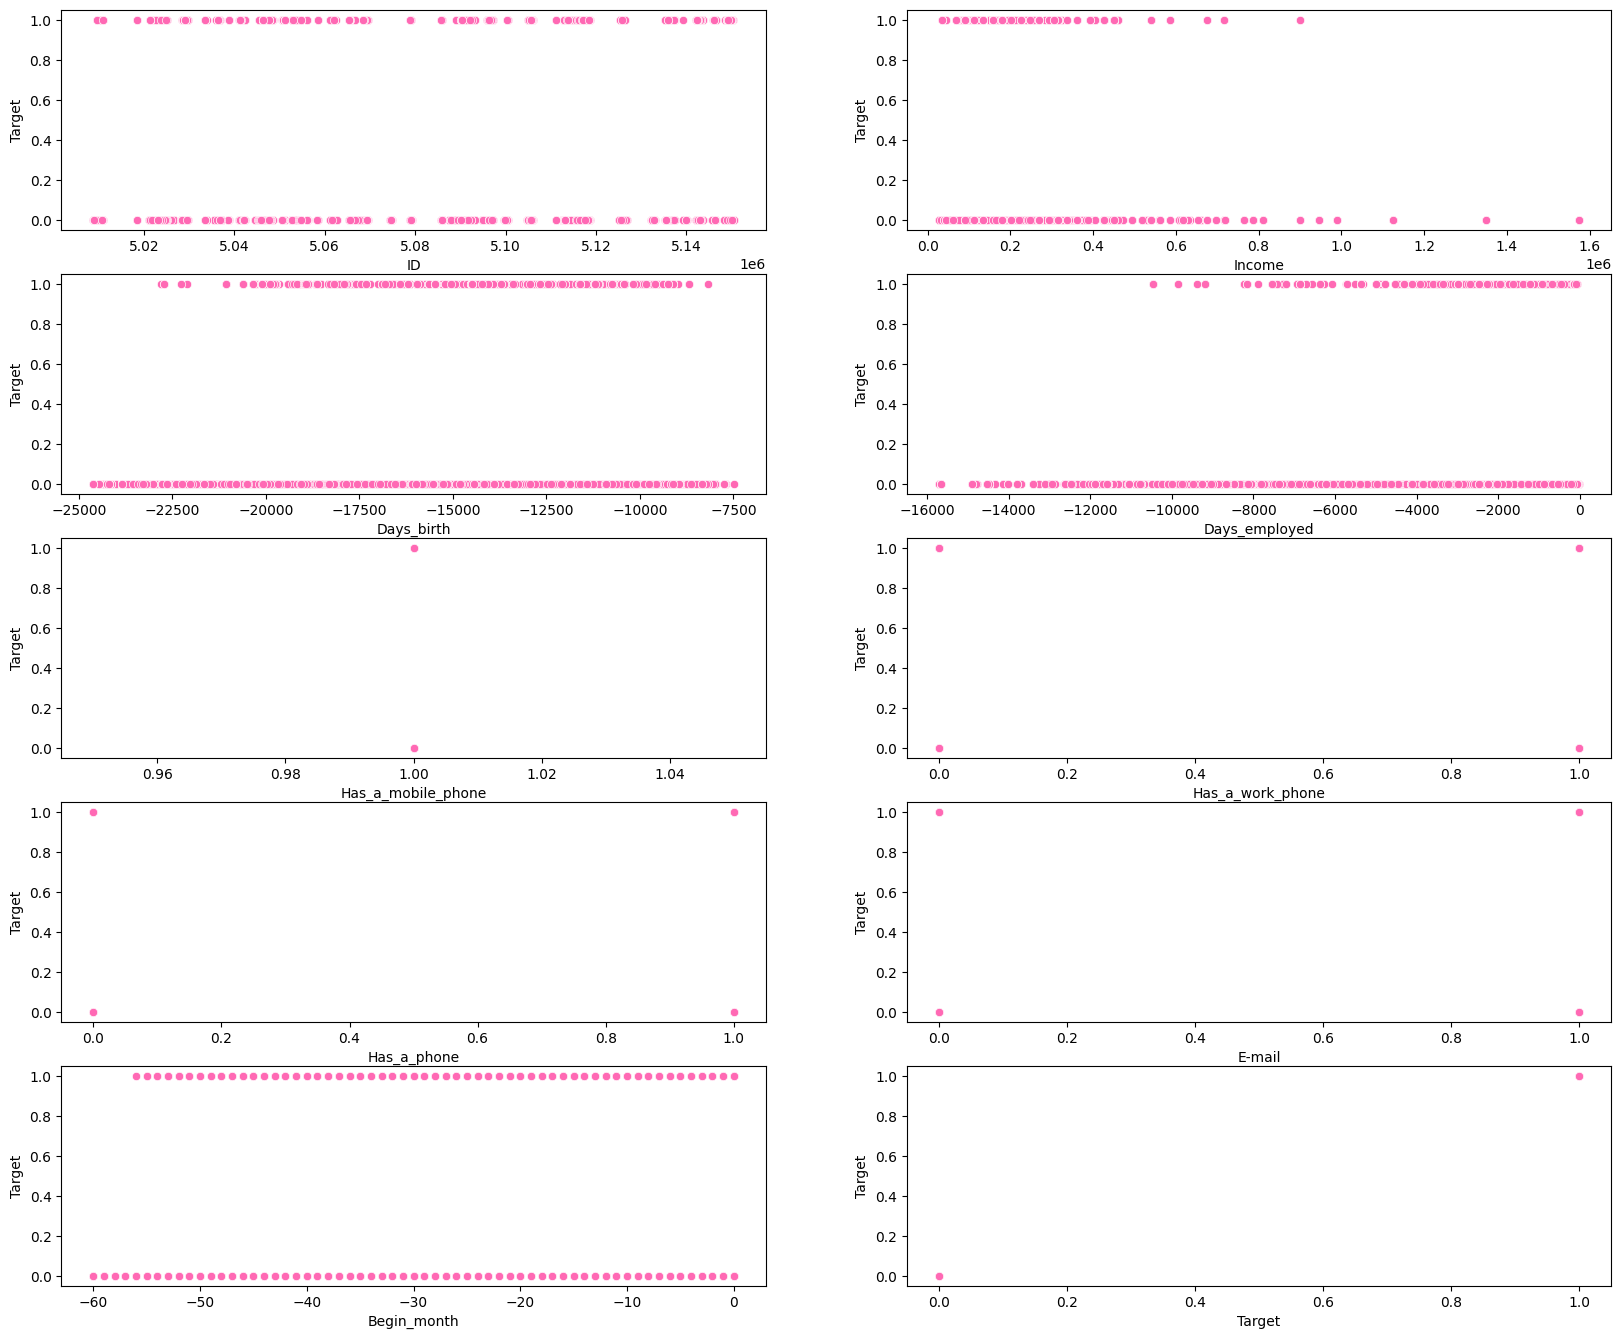

In [21]:
plt.figure(figsize=(20,20))
t=1 
for i in num_cols:
    plt.subplot(6,2,t)
    sns.scatterplot(data[i],data["Target"],color="hotpink")
    t+=1

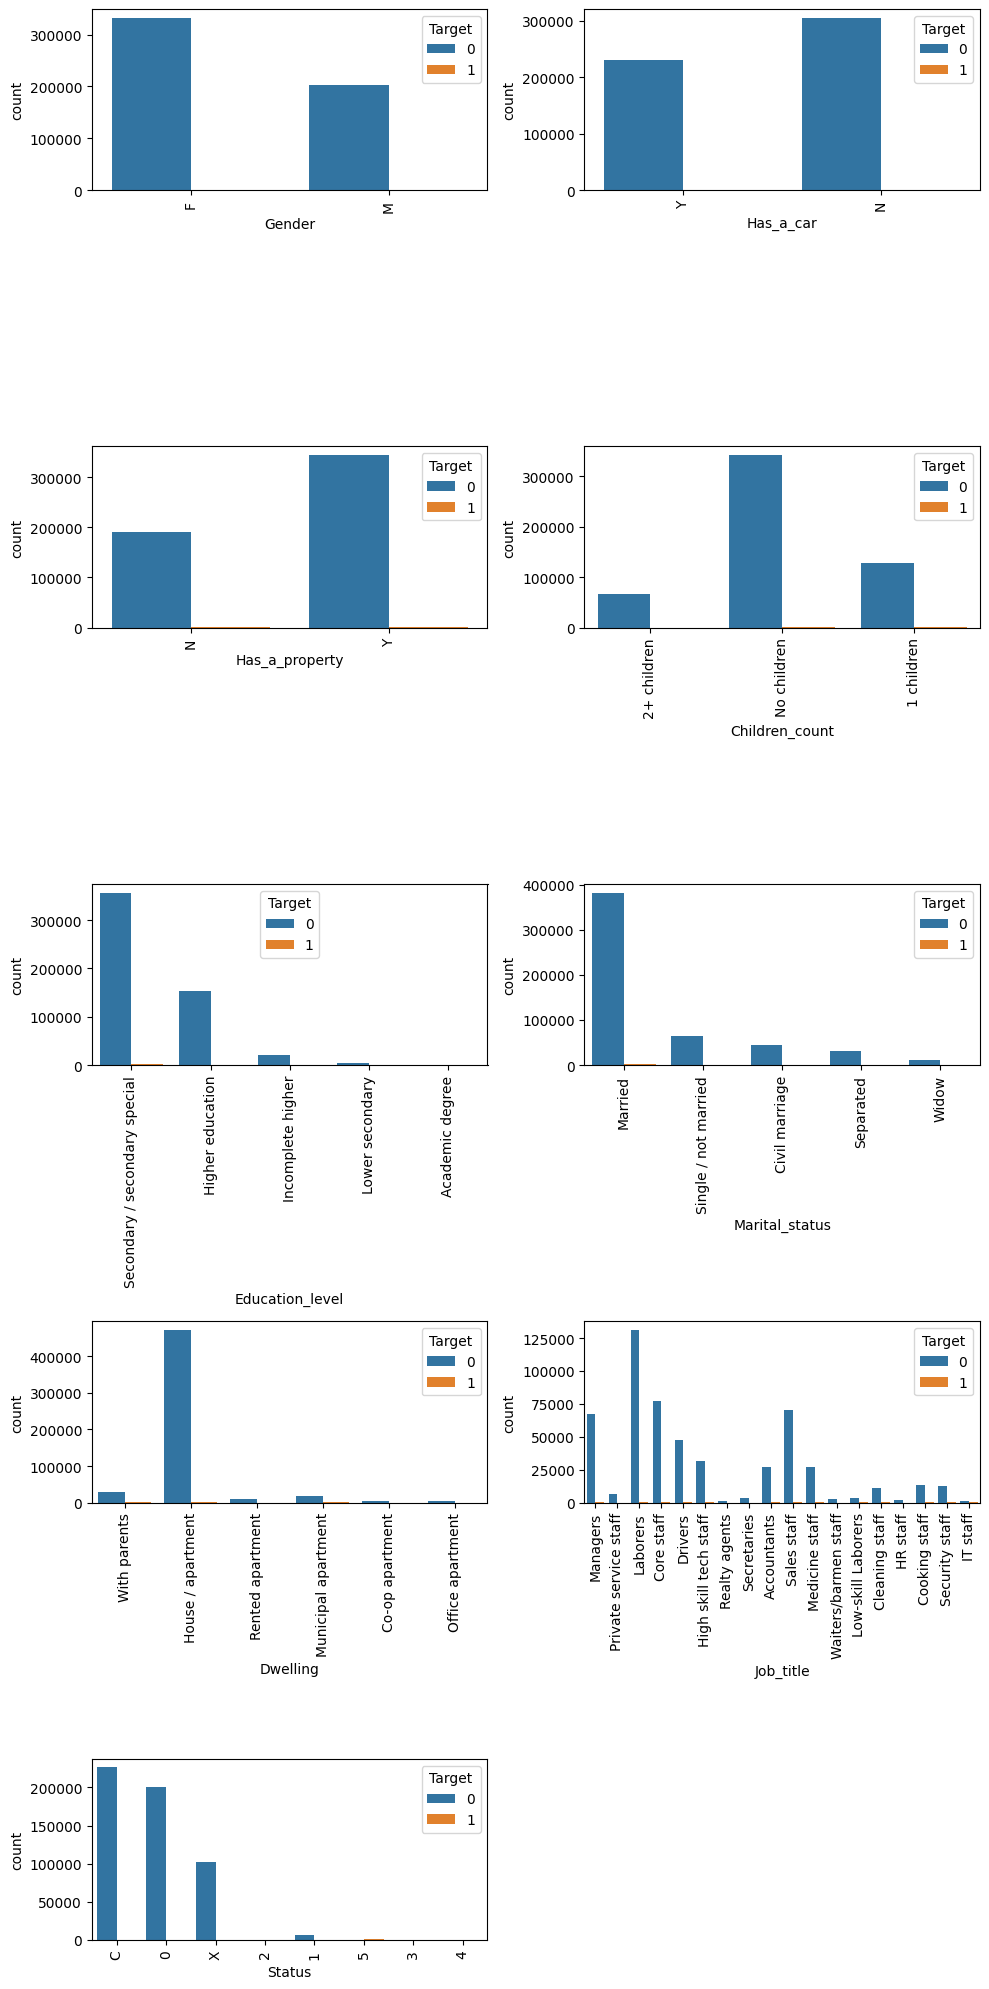

In [22]:
plt.figure(figsize=(10,20))
a=5
b=2
c=1
for i in cat_cols:
        plt.subplot(a,b,c)
        sns.countplot(data[i],hue=data["Target"])
        c+=1
        plt.xticks(rotation=90)
        plt.tight_layout()

plt.show()

# Inferences of Bivariate analysis
* Almost every application has been marked as not risky but there are some application of applicants who have no children but are married and their education level is Secondary schooling.
* These Users live in their own House/Apartment.
* Those whose applications are marked as risky come from various professions. Few of them are Managers, Labourers, Core staff and Drivers. There are applicants from other profession too but they are negligeble.
* Those who fall in category 5 of the column status, their applications are marked as risky ehich means that status is an important feature in determining whether the credit card application will be approved or not.
* There are almost negligible application received in 3 and 4 category of status column.

In [23]:
data.drop(['ID',"Has_a_mobile_phone",
           "Has_a_work_phone",
           "Has_a_car","Has_a_property"],axis=1,inplace=True)

In [24]:
data["Target"]=data["Target"].astype(object)

In [27]:
num = data.select_dtypes(include=np.number).columns
num

Index(['Income', 'Days_birth', 'Days_employed', 'Has_a_phone', 'E-mail',
       'Begin_month'],
      dtype='object')

In [28]:
cat = data.select_dtypes(include=object).columns
cat

Index(['Gender', 'Children_count', 'Education_level', 'Marital_status',
       'Dwelling', 'Job_title', 'Status', 'Target'],
      dtype='object')

# CHECKING FOR OUTLIERS 

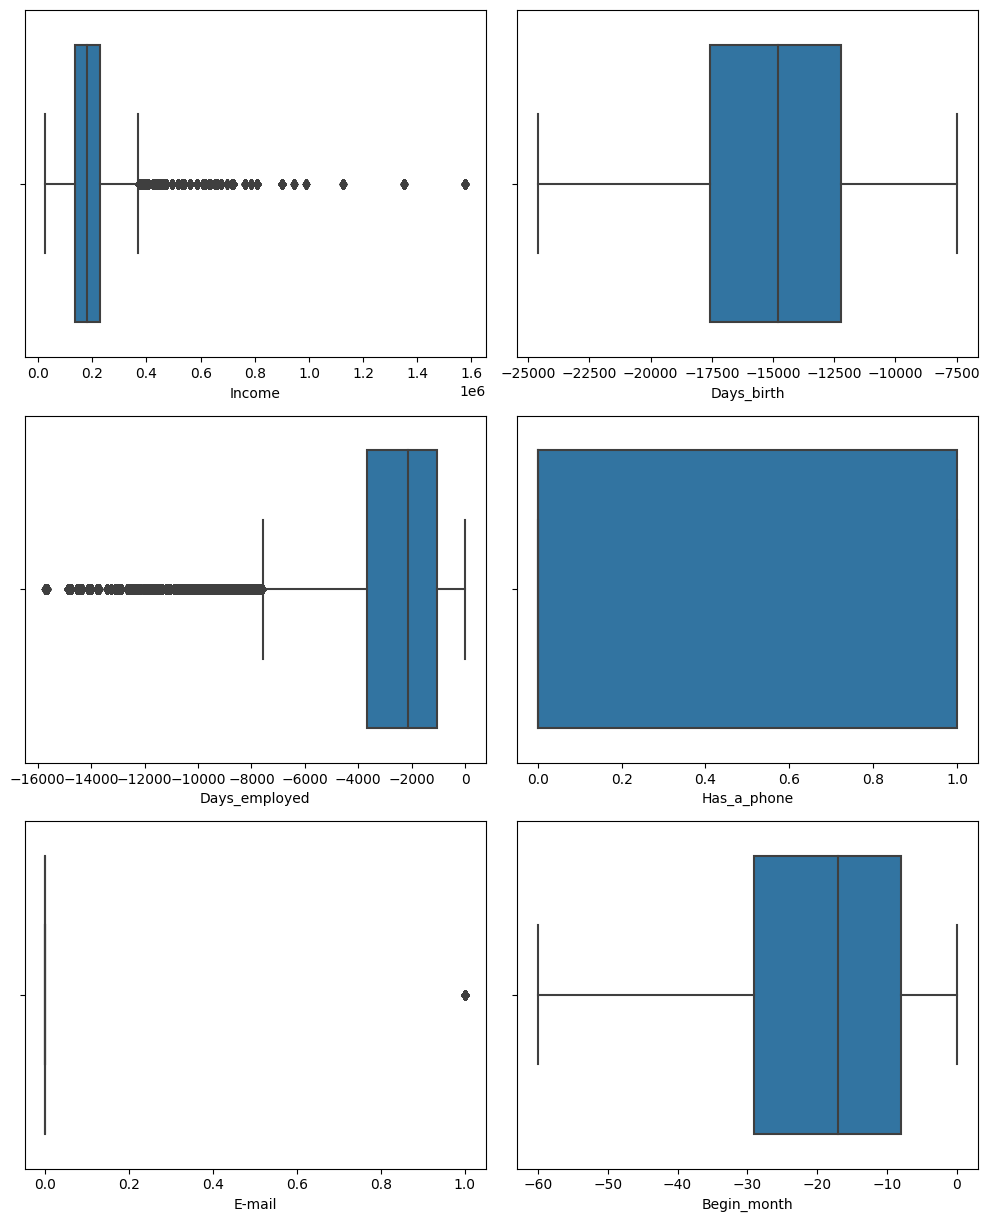

In [29]:
plt.figure(figsize=(10,20))
c=1
for i in num:
    plt.subplot(5,2,c)
    sns.boxplot(data[i])
    c=c+1
    plt.tight_layout()
plt.show()

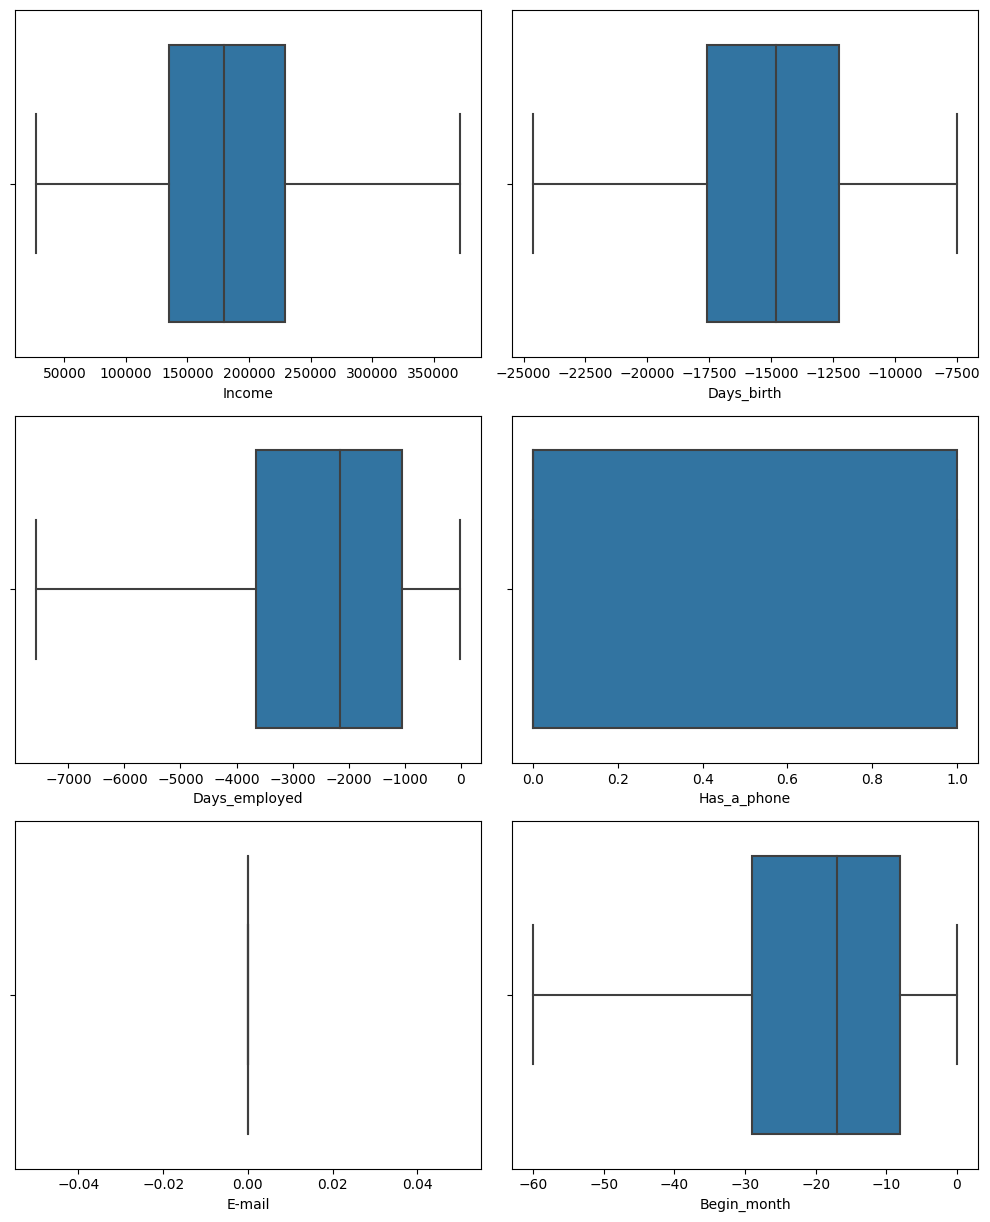

In [30]:
# Now We Treating the Outliers 
for i in num:
    q1,q3=np.quantile(data[i],[0.25,0.75])
    iqr=q3-q1
    upper_lim=q3+(1.5*iqr)
    lower_lim=q1-(1.5*iqr)
    data.loc[data[i]>upper_lim,i]=upper_lim
    data.loc[data[i]<lower_lim,i]=lower_lim
    
plt.figure(figsize=(10,20))
c=1
for i in num:
    plt.subplot(5,2,c)
    sns.boxplot(data[i])
    c=c+1
    plt.tight_layout()
plt.show()

In [ ]:
# Now we treat the Outliers Succesfully

In [31]:
# Now we looking on date columns so we see our values are in Negatives
data['Days_employed'].describe()

count   537667.000000
mean     -2648.260402
std       2050.494609
min      -7577.500000
25%      -3661.000000
50%      -2147.000000
75%      -1050.000000
max        -17.000000
Name: Days_employed, dtype: float64

In [32]:
data['Days_birth'].describe()

count   537667.000000
mean    -15010.958999
std       3416.418092
min     -24611.000000
25%     -17594.000000
50%     -14785.000000
75%     -12239.000000
max      -7489.000000
Name: Days_birth, dtype: float64

In [33]:
data['Begin_month'].describe()

count   537667.000000
mean       -19.305241
std         14.037827
min        -60.000000
25%        -29.000000
50%        -17.000000
75%         -8.000000
max          0.000000
Name: Begin_month, dtype: float64

In [35]:
date_cols = ['Begin_month','Days_birth','Days_employed']

In [36]:
 # Above columns have negative values convert them into positive
for i in date_cols:
    data[i]=abs(data[i])

In [37]:
# Now we check the Results
data['Begin_month'].describe()
# Our Values are positives..

count   537667.000000
mean        19.305241
std         14.037827
min          0.000000
25%          8.000000
50%         17.000000
75%         29.000000
max         60.000000
Name: Begin_month, dtype: float64

In [38]:
data.skew()

Income           0.676475
Days_birth       0.238675
Days_employed    0.971089
Has_a_phone      0.878634
E-mail           0.000000
Begin_month      0.604699
Target          16.463458
dtype: float64

In [52]:
num = data.select_dtypes(include=np.number)

In [53]:
cat = data.select_dtypes(include=object)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled = pd.DataFrame(sc.fit_transform(num),columns =num.columns) # after scaling it will generate array
# so we need to convert into dataframe 

### we used feature_engine library to encode the categorical data
#### according to this we give the respective weightage to the class considering the target column with each individual class
#### formula of woe is 

**log(p(X=xj|Y=1)/p(X=xj|Y=0))**
**probability of class when it was defaulter / probability of class when it was non-defaulter**


**why is it preffered compared to others**
* we got rid of curse of dimensionality
* we gave equal importance to classes
* we considered the classes with target and then gave weightage

In [56]:
scaled.head()

,Income,Days_birth,Days_employed,Has_a_phone,E-mail,Begin_month
0,0.976424,-0.513099,-0.169842,-0.652929,0.000000,-0.947814
1,-1.356999,0.838610,-1.107666,1.531560,0.000000,-1.090287
2,0.976424,1.337086,-0.790181,1.531560,0.000000,-1.375231
3,-0.968095,0.028697,-0.337607,-0.652929,0.000000,-1.161523
4,-0.634749,0.664451,1.428798,-0.652929,0.000000,0.690617


In [59]:
category=cat.drop("Target",axis=1)
from feature_engine.encoding import WoEEncoder
woe=WoEEncoder()

In [61]:
category.Status.unique()
#we ensured to keep deliquent a different lable so we marked them as 1 rest all 0.
#1's are the category of people that has debt due more than a month and we want 
#our model to know these deliquent customers since it is the objective of our case study

array(['C', '0', 'X', '2', '1', '5', '3', '4'], dtype=object)

In [62]:
safe=["0","C","X"]
def convert(string):
    if string in safe:
        return 0
    else:
        return 1

In [63]:
category["Status"]=category["Status"].apply(convert)

### we are rudcing the classes of each category in order to have similar data point in each class

In [64]:
def child(string):
    if string=="No children":
        return "No_kid"
    else:
        return "with_kids"

In [65]:
category["Children_count"]=category["Children_count"].apply(child)

In [66]:
educated=["Academic degree","Higher education","Secondary / secondary special"]
def school(string):
    if string in educated:
        return "educated"
    else:
        return "less_eduacted"

In [67]:
category["Education_level"]=category["Education_level"].apply(school)

In [68]:
married=["Married","Civil marriage"]
def marriage(string):
    if string in married:
        return "married"
    else:
        return "single"

In [69]:
category["Marital_status"]=category["Marital_status"].apply(marriage)

In [70]:
def house(string):
    
    if string=="Rented apartment":
        
        
        return "payhousebills"
    else:
        return "dont_paybills"

In [71]:
category["Dwelling"]=category["Dwelling"].apply(house)

In [72]:
cat['Target']=cat['Target'].astype(int)

In [73]:
good_pay=["Managers","High skill tech staff","Accountants","IT staff"]
normal_pay=["Private service staff","Secretaries","Medicine staff"]

def job(string):
    if string in good_pay:
        return "Goodpay"
    elif string in normal_pay:
        return "Normalpay"
    else:
        return "lesspay"

In [74]:
category["Job_title"]=category["Job_title"].apply(job)

In [75]:
# Now We Start Encoding
encoded=woe.fit_transform(category,cat.Target)

In [76]:
encoded.shape,num.shape

((537667, 7), (537667, 6))

In [77]:
num.head()

,Income,Days_birth,Days_employed,Has_a_phone,E-mail,Begin_month
0,270000,13258.000000,2300.000000,0.000000,0,6.000000
1,81000,17876.000000,377.000000,1.000000,0,4.000000
2,270000,19579.000000,1028.000000,1.000000,0,0.000000
3,112500,15109.000000,1956.000000,0.000000,0,3.000000
4,139500,17281.000000,5578.000000,0.000000,0,29.000000


In [78]:
category=pd.concat([encoded,cat.Target],axis=1)

In [80]:
category["sn"]=np.arange(0,537667)

In [81]:
scaled["sn"]=np.arange(0,537667)

In [82]:
final_data=scaled.merge(category,on="sn",how="inner")

In [83]:
final_data.shape

(537667, 15)

In [84]:
final_data.drop("sn",axis=1,inplace=True)

In [85]:
from sklearn.model_selection import train_test_split
X=final_data.drop("Target",axis=1)
y=final_data.Target

In [86]:
# Now we split our data 
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=10)

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dtree=DecisionTreeClassifier(criterion="entropy",max_depth=10,class_weight="balanced")

In [89]:
modeltree=dtree.fit(xtrain,ytrain)

In [90]:
pred=modeltree.predict(xtest)

In [91]:
from sklearn.metrics import recall_score,precision_score,confusion_matrix,f1_score

In [92]:
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
confusion_matrix(ytest,pred)
print("f1 score:",f1_score(ytest,pred))

recall score: 0.9709677419354839
precision score: 0.29950248756218906
f1 score: 0.45779467680608366


In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc=RandomForestClassifier(n_estimators=400,max_depth=10,class_weight="balanced",random_state=10)
modelrfc=rfc.fit(xtrain,ytrain)
pred=modelrfc.predict(xtest)
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
confusion_matrix(ytest,pred)
print("f1 score:",f1_score(ytest,pred))

recall score: 0.9887096774193549
precision score: 0.27378293881196963
f1 score: 0.42882126617698496


In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
smote=SMOTE()

In [97]:
bxtrain,bytrain=smote.fit_resample(xtrain,ytrain)

In [98]:
rfc=RandomForestClassifier(n_estimators=400,max_depth=10,random_state=10)
modelrfc=rfc.fit(bxtrain,bytrain)
pred=modelrfc.predict(xtest)
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))

recall score: 0.9919354838709677
precision score: 0.27369826435246997
f1 score: 0.4290198814091385
[[159049   1632]
 [     5    615]]


In [99]:
confusion_matrix(ytest,pred)

array([[159049,   1632],
       [     5,    615]], dtype=int64)

In [100]:
modelrfc.score(bxtrain,bytrain)

0.9949496565553138

In [101]:
features=pd.Series(modelrfc.feature_importances_,index=xtrain.columns).sort_values(ascending=False)

<AxesSubplot: >

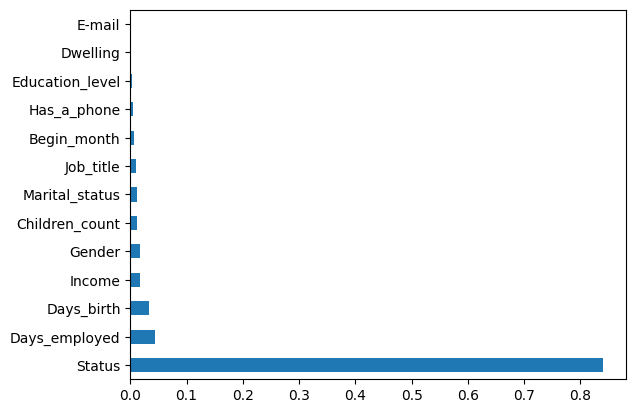

In [102]:
features.plot(kind="barh")

In [103]:
features.index

Index(['Status', 'Days_employed', 'Days_birth', 'Income', 'Gender',
       'Children_count', 'Marital_status', 'Job_title', 'Begin_month',
       'Has_a_phone', 'Education_level', 'Dwelling', 'E-mail'],
      dtype='object')

In [104]:
#we are taking only features that make strong impact to the target 
importantfaetures=X.drop(['Has_a_phone',"Dwelling",'Has_a_phone','Education_level'],axis=1)

In [105]:
xtrain,xtest,ytrain,ytest=train_test_split(importantfaetures,y,test_size=0.30,random_state=1)

In [106]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(sampling_strategy=0.50)

In [107]:
bxtrain,bytrain=smote.fit_resample(xtrain,ytrain)

In [108]:
bytrain.value_counts()

0    374977
1    374977
Name: Target, dtype: int64

In [109]:
rfc=RandomForestClassifier(n_estimators=400,max_depth=10,random_state=1)
modelrfc=rfc.fit(bxtrain,bytrain)
pred=modelrfc.predict(xtest)
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))

recall score: 0.9842931937172775
precision score: 0.24955752212389382
f1 score: 0.3981644899399929
[[159032   1696]
 [     9    564]]


In [110]:
from xgboost import XGBClassifier

In [111]:
xgb= XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

In [112]:
modelxgb=xgb.fit(bxtrain,bytrain)

In [113]:
pred=modelxgb.predict(xtest)
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))

recall score: 0.9144851657940664
precision score: 0.38843587842846555
f1 score: 0.5452653485952134
[[159903    825]
 [    49    524]]


In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
#creating grid
n_estimators=[100,200,300,400]
max_features=[10,11,12,14,15]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10]
max_depth=[3,5,7,10,15]
random_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400], 'max_features': [10, 11, 12, 14, 15], 'max_depth': [3, 5, 7, 10, 15], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5, 10]}


In [116]:
xgb=XGBClassifier()

In [117]:
rf_random=RandomizedSearchCV(estimator=xgb,param_distributions=random_grid,
                               scoring="f1",n_iter=5,cv=3,random_state=10)

In [118]:
rf_random.fit(bxtrain,bytrain)

[14:28:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[14:29:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[14:30:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[14:31:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[14:32:44] WARNING: C:/build

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5,
                   param_distributions={'max_depth': [3, 5, 7, 10, 15],
                                        'max_features': [10, 11, 12, 14, 15],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=10, scoring='f1')

In [119]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 11,
 'max_depth': 10}

In [120]:
pred=rf_random.predict(xtest)

In [121]:
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))

recall score: 0.8027923211169284
precision score: 0.7153965785381027
f1 score: 0.756578947368421
[[160545    183]
 [   113    460]]


In [122]:
rf_random.best_score_

0.999101528897269

taking time
from sklearn.model_selection import GridSearchCV, StratifiedKFold param_grid={'n_estimators':range(100,200,2), 'max_depth':range(3,8), 'min_samples_split':range(2,10,2)}

cv=StratifiedKFold(n_splits=5,shuffle=False) model=GridSearchCV(RandomForestClassifier(),param_grid,scoring="f1",n_jobs=-1,cv=cv) model.fit(bxtrain,bytrain) model.best_params_ model.best_score_ model=model.best_estimator_ pred=model.predict(xtest) print("recall score",recall_score(ytest,pred)) print("precision score",precision_score(ytest,pred)) print(confusion_matrix(ytest,pred)) print("f1_score",f1_score(ytest,pred))

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [124]:
from sklearn.naive_bayes import GaussianNB

In [125]:
#checking for best mdoel evaluation
def models_eval():
    models,names=[],[]
    models.append(LogisticRegression())
    names.append("lr")
    
    models.append(GaussianNB())
    names.append("nvb")
    
    models.append(KNeighborsClassifier())
    names.append("knn")
    
    models.append(DecisionTreeClassifier())
    names.append("dtree")
    
    models.append(RandomForestClassifier())
    names.append("rfc")
    
    models.append(AdaBoostClassifier())
    names.append("ada")
    
    models.append(GradientBoostingClassifier())
    names.append("gbc")
    
    models.append(XGBClassifier())
    names.append("xgb")
    
    return models,names

In [126]:
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import StratifiedKFold

In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
def evaluation(X,y):
    models,names=models_eval()
    results=[]
    
    for i in range(len(models)):
        cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=5,random_state=10)
        scores=cross_val_score(models[i],X,y,scoring="f1",cv=cv)
        results.append(scores)
    
    plt.boxplot(results,labels=names,showmeans=True)

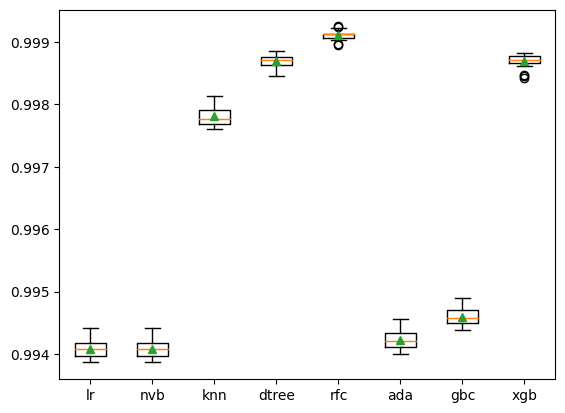

In [129]:
evaluation(bxtrain,bytrain)

In [130]:
bxtrain.columns

Index(['Income', 'Days_birth', 'Days_employed', 'E-mail', 'Begin_month',
       'Gender', 'Children_count', 'Marital_status', 'Job_title', 'Status'],
      dtype='object')

In [131]:
# final model
#using random forest classifier hyperparamter tuning
n_estimators=[100,200,300,400,500]
max_features=[1,2,3,4,5,6,7,8,9]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10,15,20]
max_depth=[3,5,7,10,15,20,25,30]
random_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [3, 5, 7, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5, 10, 15, 20]}


In [132]:
rfc=RandomForestClassifier()

In [133]:
rf_random=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,scoring="f1",n_iter=5,cv=3,random_state=10)

In [134]:
rf_random.fit(bxtrain,bytrain) 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [3, 5, 7, 10, 15, 20, 25,
                                                      30],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=10, scoring='f1')

In [135]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 20,
 'min_samples_leaf': 5,
 'max_features': 9,
 'max_depth': 25}

In [136]:
rf_random.best_score_

0.998103056570873

In [137]:
pred=rf_random.predict(xtest)

In [138]:
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))

recall score: 0.8952879581151832
precision score: 0.5049212598425197
f1 score: 0.645689112649465
[[160225    503]
 [    60    513]]
